In [1]:
import numpy as np
from matplotlib import pyplot as plt

from mfpml.design_of_experiment.singlefideliy_samplers import LatinHyperCube
from mfpml.models.sf_gpr import Kriging
from mfpml.problems.singlefidelity_reliability_analysis import (FourBranches,
                                                                MultiModal)
from mfpml.reliablity_analysis.sf_active_learning_ra import SFActiveLearningRA
from mfpml.reliablity_analysis.sf_learning_functions import EFF, RLCB, U
from mfpml.reliablity_analysis.stopping_criteria import (
    BootstrapStoppingCriteria, UStoppingCriteria)


In [2]:

#  define problem
problem = MultiModal()

# define the number of initial samples
sampler = LatinHyperCube(design_space=problem.design_space, seed=2)
init_samples = sampler.get_samples(num_samples=10)
init_y = problem.f(init_samples)


#
lf = RLCB()
sfra = SFActiveLearningRA(problem=problem)

# initilize surrogate model
kriging = Kriging(design_space=problem._input_domain)


In [3]:
# define surrogate model
sfra.run_analysis(surrogate=kriging,
                  init_x=init_samples,
                  init_y=init_y,
                  learning_function=lf,
                  stopping_criterion=BootstrapStoppingCriteria(CI_factor=0.05),
                  stopping_threshold=0.03,
                  num_mcs=10**4,
                  seed=123,
                  print_info=True)


=================== gen: 1,iter:0 ==================
estimated pf: 0.005500 estimated cov: 0.134469
real pf: 0.034200 real cov: 0.053141
number of samples: 10 stopping value: 0.259467
=================== gen: 1,iter:1 ==================
estimated pf: 0.011200 estimated cov: 0.093960
real pf: 0.034200 real cov: 0.053141
number of samples: 11 stopping value: 1.440857
=================== gen: 1,iter:2 ==================
estimated pf: 0.009700 estimated cov: 0.101041
real pf: 0.034200 real cov: 0.053141
number of samples: 12 stopping value: 0.104323
=================== gen: 1,iter:3 ==================
estimated pf: 0.014400 estimated cov: 0.082731
real pf: 0.034200 real cov: 0.053141
number of samples: 13 stopping value: 0.091099
=================== gen: 1,iter:4 ==================
estimated pf: 0.020700 estimated cov: 0.068782
real pf: 0.034200 real cov: 0.053141
number of samples: 14 stopping value: 0.072231
=================== gen: 1,iter:5 ==================
estimated pf: 0.024200 esti

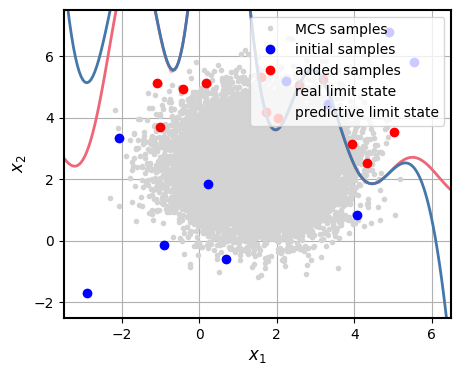

In [5]:
sfra.plot_fitting(figsize=(5, 4))